In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

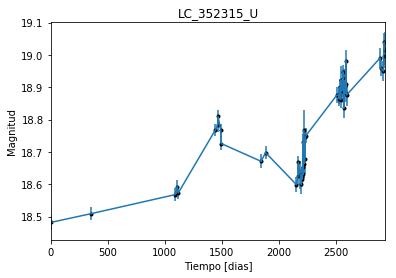

In [2]:
data = np.genfromtxt('LC_352315_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_352315_U')
plt.savefig("LC_352315_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

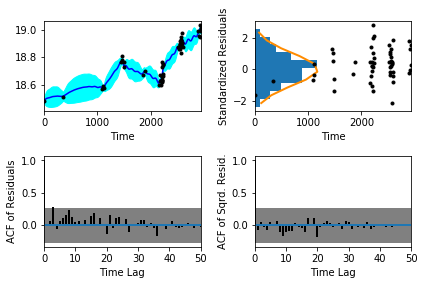

In [8]:
sample.assess_fit()

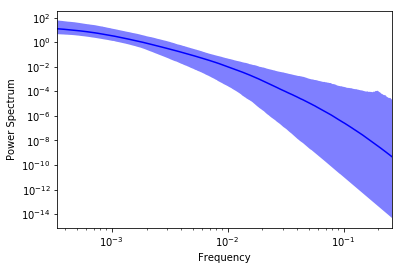

In [9]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [10]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

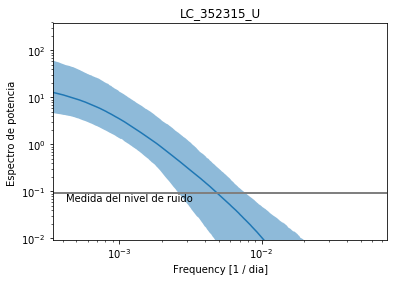

In [11]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_352315_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_352315_U')

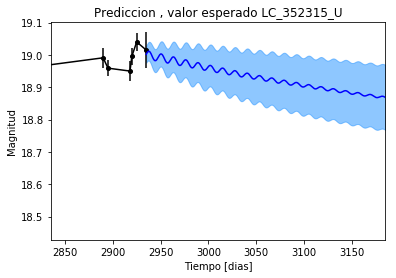

In [12]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_352315_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_352315_U')

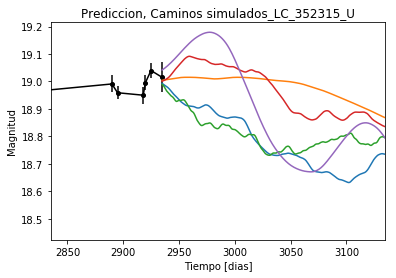

In [13]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_352315_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


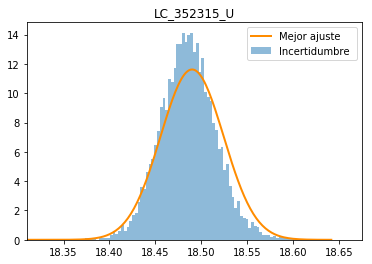

In [14]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_352315_U')
plt.savefig("Mejor_ajuste_LC_352315_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_352315_U')

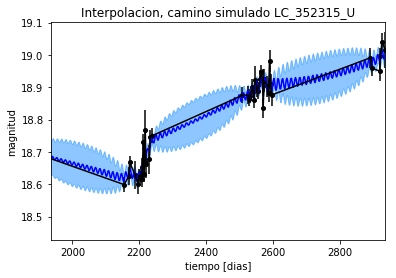

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_352315_U')

Text(0.5,1,'Interpolacion, camino simulado LC_352315_U')

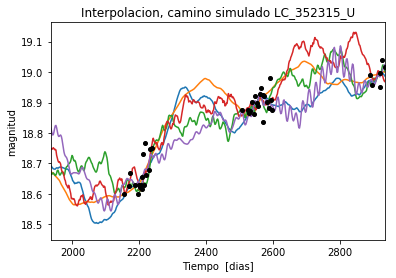

In [16]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_352315_U')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 516.569911643
Median: 0.0138980225673
Standard deviation: 0.104580400232
68% credibility interval: [ 0.00126778  0.13812979]
95% credibility interval: [ 0.00043063  0.40219078]
99% credibility interval: [  3.60735128e-04   4.80780230e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 458.240577684
Median: 0.0022746041764
Standard deviation: 0.0452668956037
68% credibility interval: [ 0.00049785  0.02134763]
95% credibility interval: [ 0.00036234  0.1454943 ]
99% credibility interval: [ 0.00034316  0.32744327]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 679.542825217
Median: 0.0226038579343
Standard deviation: 0.13452183

In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 670.558912144
Median: 107.43310055
Standard deviation: 1.8742772029
68% credibility interval: [ 105.35081389  109.02063651]
95% credibility interval: [ 102.8269361   109.91238849]
99% credibility interval: [ 100.70940602  110.51305449]


In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 673.337422225
Median: 0.577944890931
Standard deviation: 1.26335999455
68% credibility interval: [ 0.07355899  2.48800788]
95% credibility interval: [ 0.01668094  4.39701059]
99% credibility interval: [ 0.01150929  5.68584869]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 304.193731567
Median: 0.380197135416
Standard deviation: 2.52359421578
68% credibility interval: [ 0.02758262  3.03412677]
95% credibility interval: [  3.10152130e-0

In [21]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20040.199394
Median: 8.71162286404e-21
Standard deviation: 1.53945777379e+65
68% credibility interval: [  2.27420394e-41   5.38068466e-05]
95% credibility interval: [  1.69780245e-74   9.49210106e+01]
99% credibility interval: [  1.56119937e-86   6.81885301e+43]


In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2751.17902556
Median: 18.6949645811
Standard deviation: 0.0912371489443
68% credibility interval: [ 18.61752533  18.77677558]
95% credibility interval: [ 18.52523249  18.88267118]
99% credibility interval: [ 18.43860193  19.00803431]


In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 370.338504154
Median: 0.00854934448148
Standard deviation: 0.131101180804
68% credibility interval: [ 0.          0.21484515]
95% credibility interval: [ 0.         0.4617208]
99% credibility interval: [ 0.          0.50875509]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 370.338504154
Median: 0.00854934448148
Standard deviation: 0.131101180804
68% credibility interval: [ 0.          0.21484515]
95% credibility interval: [ 0.         0.4617208]
99% credibility interval: [ 0.          0.50875509]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2116.6223502
Median: 0.0
Standard deviation: 0.000233409335492
68% credi

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 670.558912144
Median: 107.43310055
Standard deviation: 1.8742772029
68% credibility interval: [ 105.35081389  109.02063651]
95% credibility interval: [ 102.8269361   109.91238849]
99% credibility interval: [ 100.70940602  110.51305449]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1158.78504725
Median: 0.0281197042149
Standard deviation: 0.031794292911
68% credibility interval: [ 0.01766077  0.05222536]
95% credibility interval: [ 0.01197575  0.11136281]
99% credibility interval: [ 0.00980008  0.20314283]


In [27]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1461.03755209
Median: 1.16088088344
Standard deviation: 0.194522014737
68% credibility interval: [ 0.98968119  1.36589539]
95% credibility interval: [ 0.83935324  1.61606015]
99% credibility interval: [ 0.75907854  1.77448942]


In [28]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 431.91497178
Median: 0.000144920820451
Standard deviation: 0.0173974166874
68% credibility interval: [  5.71085939e-06   2.67566268e-03]
95% credibility interval: [  1.88169500e-07   2.83081844e-02]
99% credibility interval: [  5.08038726e-48   1.61140658e-01]


In [29]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 516.569911643
Median: (-0.0873238511935-0.42983707887j)
Standard deviation: 1.05371433661
68% credibility interval: [-0.86789505+0.j        -0.00796571-0.6105788j]
95% credibility interval: [-2.52703921+0.j         -0.00270571-1.90226709j]
99% credibility interval: [ -3.02083128e+00+0.j          -2.26656566e-03-0.11630648j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 458.240577684
Median: (-0.0142917595408+0.257314933888j)
Standard deviation: 0.871453372215
68% credibility interval: [-0.13413112+0.47022298j -0.00312810+0.j        ]
95% credibility interval: [-0.91416764+0.64045642j -0.00227663+1.78825585j]
99% credibility interval: [-2.05738672+0.j -0.00215614+0.j]
Posterior summary for parameter ar_roots  element 